# Subhalo Velocity

In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from auriga.images import add_redshift, figure_setup
from auriga.paths import Paths
from auriga.parser import parse

In [21]:
figure_setup()

In [22]:
def read_data(simulation: str):
    galaxy, rerun, resolution = parse(simulation=simulation)
    paths = Paths(galaxy, rerun, resolution)
    sh_vel = np.loadtxt(f"../{paths.results}subhalo_vels.csv")
    df = pd.DataFrame(
        data=sh_vel,
        columns=["xVelocity_km/s", "yVelocity_km/s", "zVelocity_km/s"])
    data = pd.read_csv(f"../{paths.results}temporal_data.csv")
    df["Velocity_km/s"] = np.linalg.norm(sh_vel, axis=1)
    df["Time_Gyr"] = data["Time_Gyr"]
    return df

In [35]:
def plot_tracker_for_galaxies(simulations: list):
    fig = plt.figure(figsize=(2.0, 2.0))
    gs = fig.add_gridspec(nrows=1, ncols=1, hspace=0.0, wspace=0.0)
    ax = gs.subplots(sharex=True, sharey=True)

    ax.label_outer()
    ax.grid(True, ls='-', lw=0.25, c='silver')
    ax.tick_params(which='both', direction="in")
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 500)
    ax.set_xticks([2, 4, 6, 8, 10, 12, 14])
#     ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.set_ylabel('$v_\mathrm{sh}$ [$\mathrm{km} \, \mathrm{s}^{-1}$]')
    ax.set_xlabel('Time [Gyr]')

    for simulation in simulations:
        galaxy, rerun, resolution = parse(simulation=simulation)
        paths = Paths(galaxy, rerun, resolution)
        df = read_data(simulation=simulation)
        ax.plot(df["Time_Gyr"], df["Velocity_km/s"],
                lw=1.0, label=simulation.upper(), zorder=10)

    ax.legend(loc='upper left', ncol=1, framealpha=0, fontsize=5.0)

    add_redshift(ax)
    plt.show()

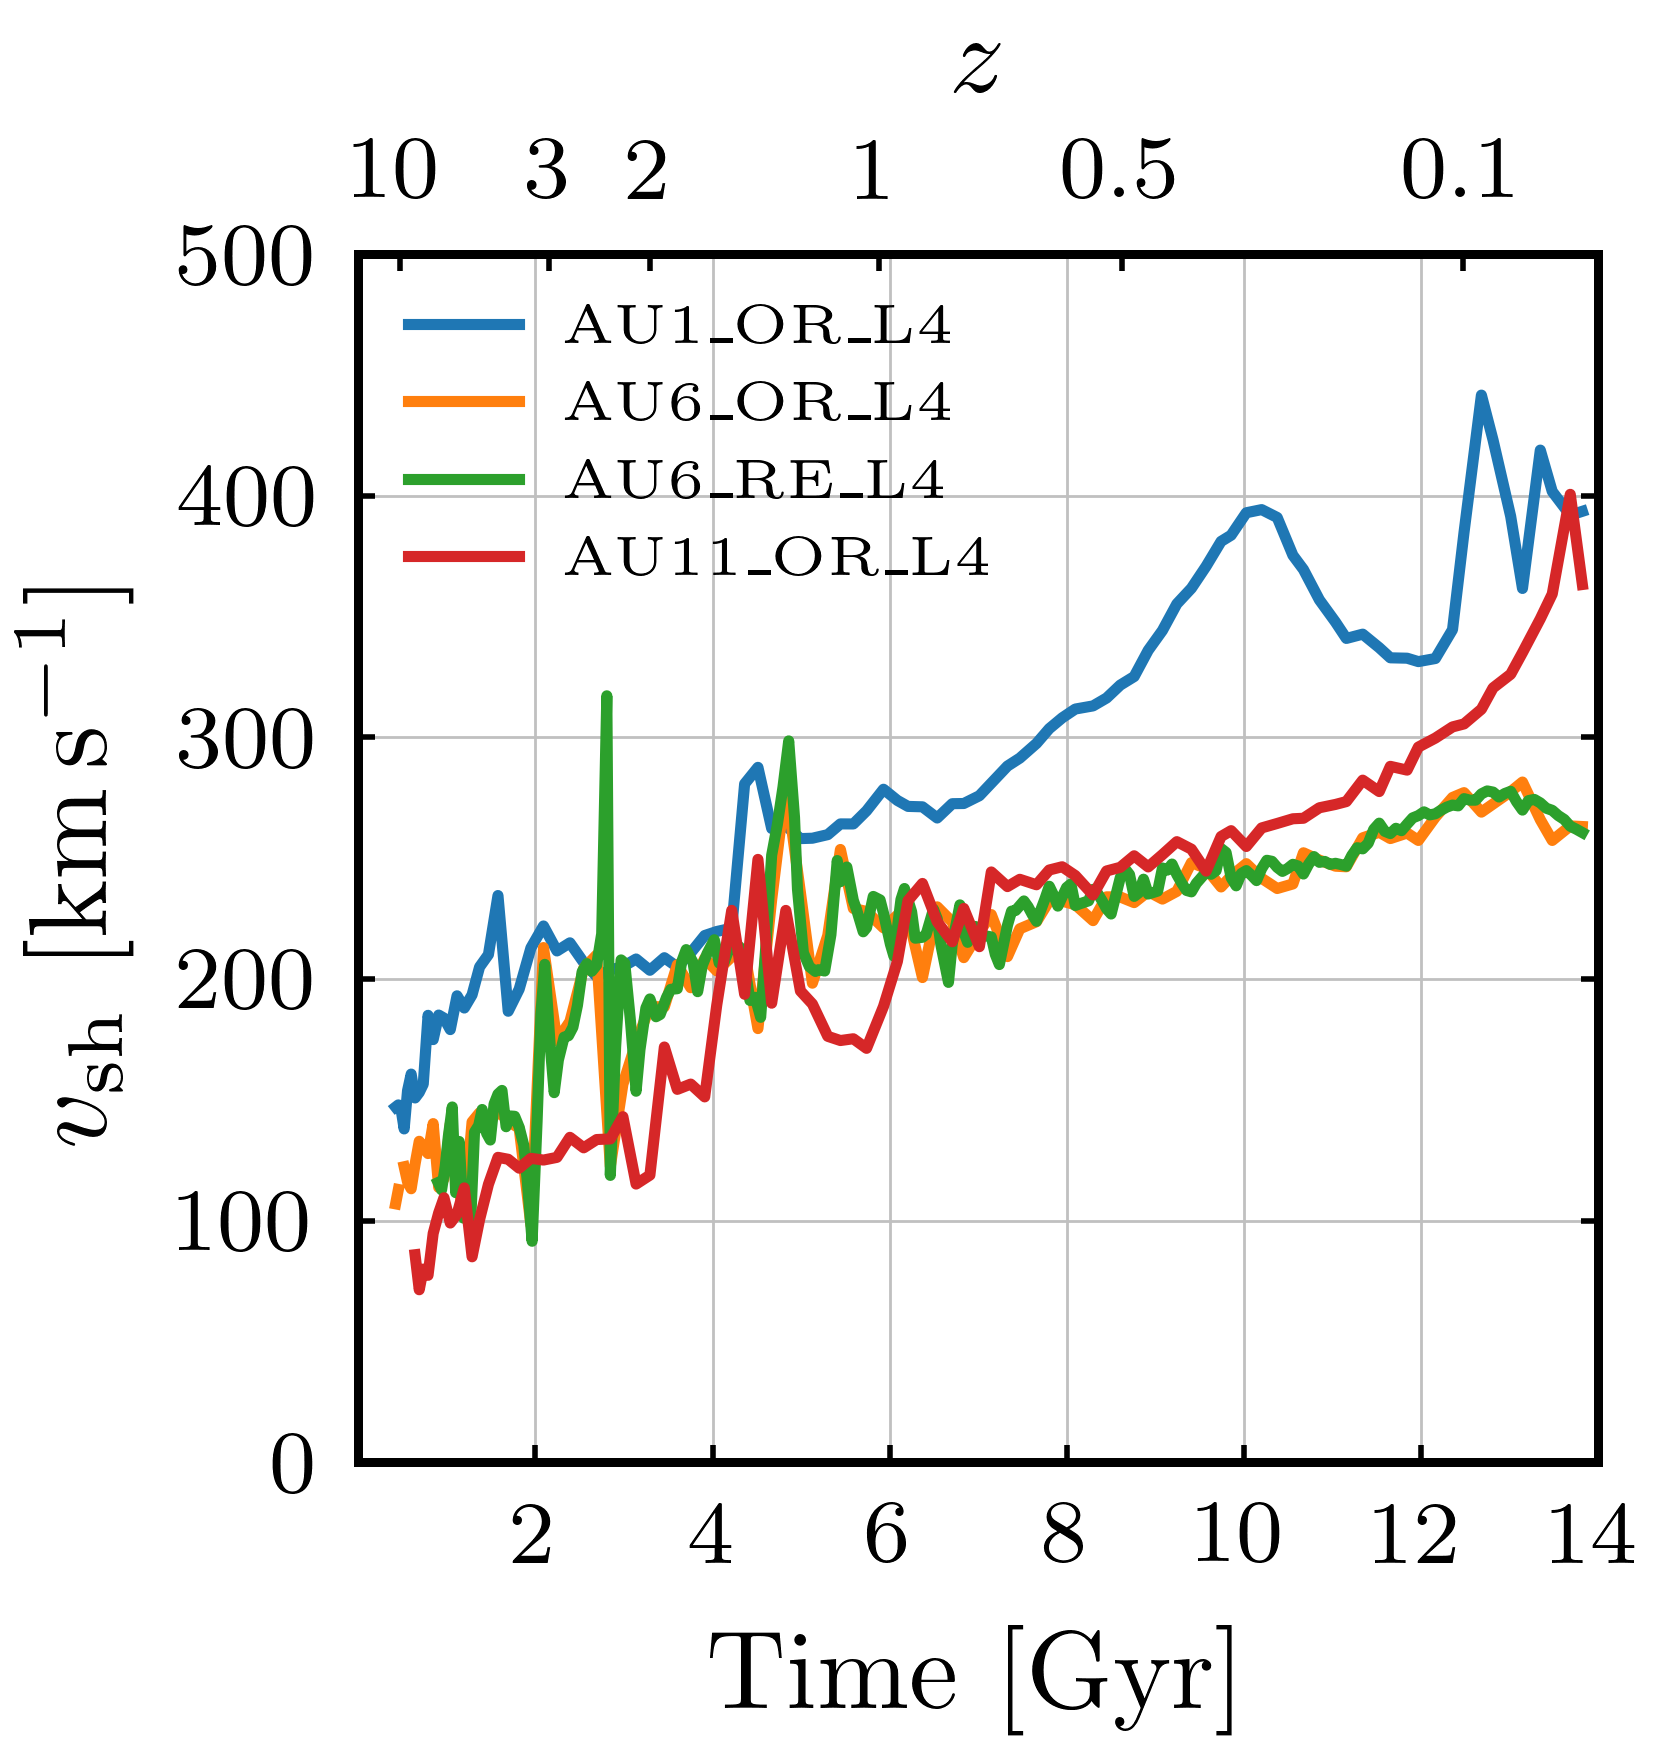

In [38]:
plot_tracker_for_galaxies(simulations=["au1_or_l4",
                                       "au6_or_l4",
                                       "au6_re_l4",
                                       "au11_or_l4"])